In [ ]:
!pip install mglearn
!pip install Koreanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 13.0 MB/s eta 0:00:00


# 선형 회귀 모델을 이용한 자동차 연비 예측

## 기본 라이브러리 임포트

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import koreanize_matplotlib
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv("/content/auto-mpg.csv", header=None)
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name']
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


# 데이터 pretreatment

In [ ]:
df['horsepower'].unique() # 물음표 땜시 그렇댜

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '?', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [ ]:
#horsepower 없앨거임
# ?-> NaN으로 처리->dropna() 메소드로 삭제-> 홀스파워 dtype 컬럼을 float으로

df['horsepower'].replace('?',np.nan, inplace = True)
df['horsepower'].unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', nan, '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [ ]:
df['horsepower'].isna().sum()

6

In [ ]:
df.isna().sum()  # 홀스파워만 문제

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
name            0
dtype: int64

In [ ]:
# 삭제시키는 코드

df.dropna(subset = ['horsepower'], axis = 0, inplace = True)
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
name            0
dtype: int64

In [ ]:
# 데이터 타입 변경
df['horsepower'] = df['horsepower'].astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    float64
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 30.6+ KB


## feature선택 -> 3개 이상 선택.

## 예측 모델 성능 평가

*   feature 선택 3개 이상 y 값은 mpg
*   모델 (리니어 리그레션, 릿지, 라쏘) 모두 사용
*   모델의 정확도가 가장 높은 모델 선택(alpha 조정 가능)
*   훈련셋과 테스트셋 결과 출력( chart 가능)
    훈련셋 70 , 데이터셋 30
    random state = 7 고정
*   피쳐 : weight ,displacement, horsepower


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    float64
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 30.6+ KB


In [87]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


## Linear Regression 을 사용한 성능평가

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# feature(X)와 target(y) 설정
X = df[['weight', 'horsepower', 'displacement']]
y = df['mpg']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

In [ ]:
Ir = LinearRegression()
Ir.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = Ir.predict(X_test)

In [ ]:
# 모델 정보 출력
print('Ir.coef:', Ir.coef_)
print('Ir.intercept_:', Ir.intercept_)
print('훈련 데이터셋의 R2:', Ir.score(X_train, y_train))
print('테스트 데이터셋의 R2:', Ir.score(X_test, y_test))

Ir.coef: [-0.00569449 -0.02119794 -0.01151377]
Ir.intercept_: 44.848255052973684
훈련 데이터셋의 R2: 0.697417072158443
테스트 데이터셋의 R2: 0.7210100820550183


In [ ]:
y_pred = Ir.predict(X_test)

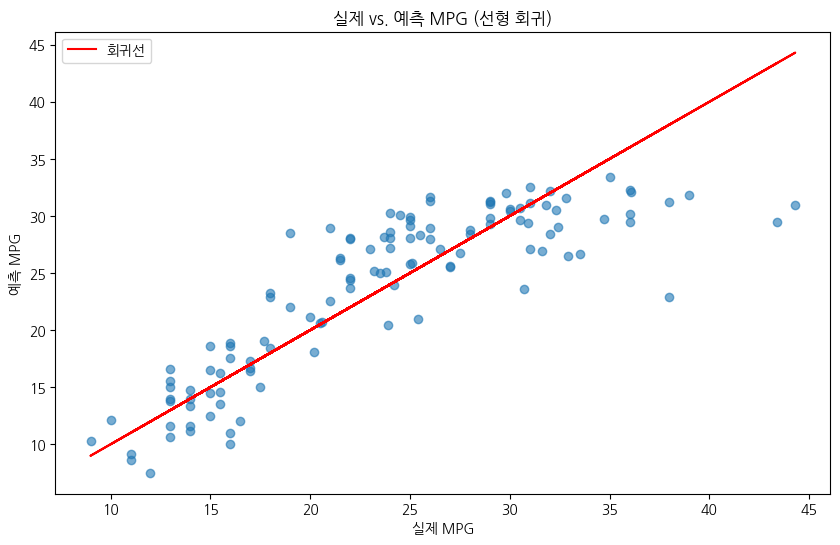

In [ ]:
# 실제 데이터와 예측값의 산점도 그래프
plt.figure(figsize=(10, 6))                          # 사이즈 설정, 산점도 그래프
plt.scatter(y_test, y_pred, alpha=0.6)               #y_test(테스트셋의 실제 MPG값)와 y_pred(모델 사용해서 테스트셋의 X 데이터를 이용해 예측한 mpg 값) 값을 산점도로 표현
plt.plot(y_test, y_test, color='r', label='회귀선')  # 회귀선 그리기
plt.xlabel('실제 MPG')
plt.ylabel('예측 MPG')
plt.title('실제 vs. 예측 MPG (선형 회귀)')
plt.legend()
plt.show()

## 릿지

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

In [ ]:
# feature(X)와 target(y) 설정
X = df[['weight', 'horsepower', 'displacement']]
y = df['mpg']


In [ ]:
#데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

In [ ]:
# 릿지 회귀 모델 생성 및 학습
ridge = Ridge(alpha=1.0)  # alpha는 정규화 강도를 조절하는 매개변수
ridge.fit(X_train, y_train)

Ridge()

In [ ]:
# 테스트 데이터셋 예측
y_pred = ridge.predict(X_test)

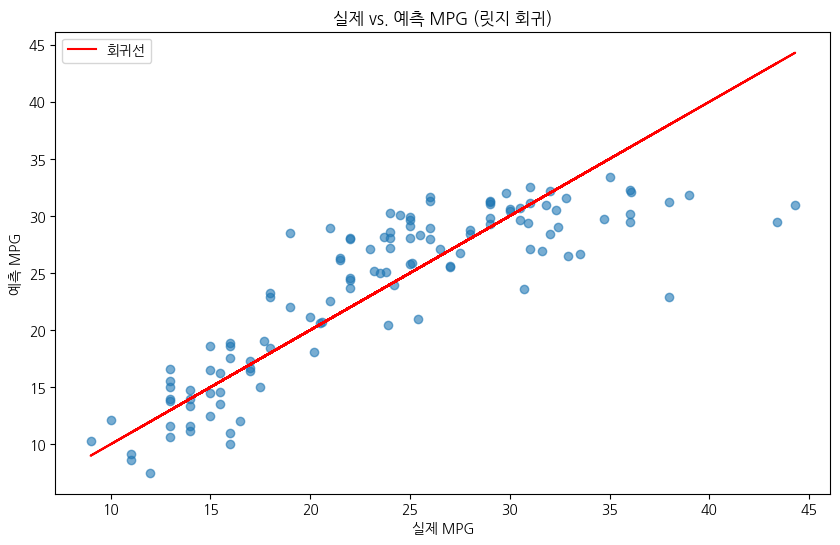

In [ ]:
# 실제 데이터와 예측값의 산점도 그래프
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot(y_test, y_test, color='r', label='회귀선')  # 회귀선 그리기
plt.xlabel('실제 MPG')
plt.ylabel('예측 MPG')
plt.title('실제 vs. 예측 MPG (릿지 회귀)')
plt.legend()
plt.show()

In [ ]:
# R-squared 점수 출력
print('훈련 데이터셋의 R-squared:', ridge.score(X_train, y_train))
print('테스트 데이터셋의 R-squared:', ridge.score(X_test, y_test))

훈련 데이터셋의 R-squared: 0.697417072158164
테스트 데이터셋의 R-squared: 0.7210099311356559


## 라쏘

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

In [ ]:
X = df[['weight', 'horsepower', 'displacement']]
y = df['mpg']

In [ ]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

In [ ]:
# 라쏘 회귀 모델 생성 및 학습
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)


Lasso()

In [ ]:
# 테스트 데이터셋 예측
y_pred = lasso.predict(X_test)

# 새 섹션

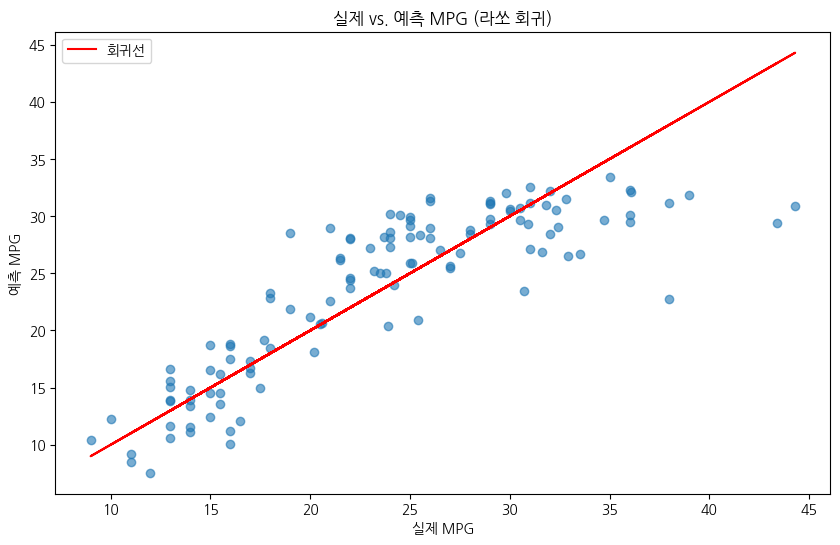

In [ ]:
# 실제 데이터와 예측값의 산점도 그래프
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot(y_test, y_test, color='r', label='회귀선')  # 회귀선 그리기
plt.xlabel('실제 MPG')
plt.ylabel('예측 MPG')
plt.title('실제 vs. 예측 MPG (라쏘 회귀)')
plt.legend()
plt.show()

In [ ]:
# R-squared 점수 출력
print('훈련 데이터셋의 R-squared:', lasso.score(X_train, y_train))
print('테스트 데이터셋의 R-squared:', lasso.score(X_test, y_test))

훈련 데이터셋의 R-squared: 0.6973779254720648
테스트 데이터셋의 R-squared: 0.7193693143811808


## 실험실 - 랏쏘


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

In [88]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [93]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

In [94]:
# 라쏘 회귀 모델 생성 및 학습
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)

Lasso()

In [95]:
# 테스트 데이터셋 예측
y_pred = lasso.predict(X_test)

In [96]:
X = df[['weight', 'horsepower', 'displacement']]
y = df['mpg']

0.6973779254720648
0.7193693143811808


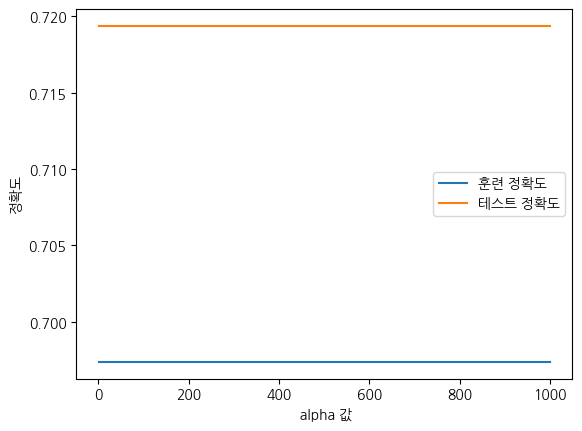

In [98]:


train_scores = []
test_scores = []


for n in range(1,1000):


  train_scores.append(lasso.score(X_train, y_train))
  test_scores.append(lasso.score(X_test, y_test))

# 예측 정확도 비교 그래프 / 띄어쓰기, for문 안에 안 들어가게 조심하기


print(max(train_scores))
print(max(test_scores))

plt.figure(dpi=100)

plt.plot(range(1,1000), train_scores, label="훈련 정확도")
plt.plot( range(1,1000), test_scores, label ="테스트 정확도")
plt.xlabel('  alpha 값 ')
plt.ylabel('정확도')
plt.legend()
plt.show()